# AULA 1

Começamos a aula 1 analisando superficialmente alguns dados de um dataset contendo informações sobre cargos na área de dados pelo mundo.

Uma das bibliotecas principais para esse trabalho é a Pandas.

In [83]:
import pandas as pd # biblioteca de análise de dados

Precisamos colocar nossos dados em um dataframe para podermos trabalhar nele:

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [85]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


**Primeira visualização dos dados:** Mostra as 10 primeiras linhas do dataset. Observamos colunas em inglês com informações sobre ano, nível de experiência, tipo de contrato, cargo, salário, localização informações da empresa e etc.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


**Análise do info():** O dataset possui 133.349 registros e 11 colunas. Os dados incluem informações sobre salários, experiência, tipo de contrato, localização e tamanho da empresa, sendo uma base robusta para análise de mercado de trabalho em dados.

**Dimensões do dataset:** 133.349 linhas e 11 colunas.


In [87]:
df.describe() #estatisticas descritivas das variaveis numericas

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


**Estatísticas descritivas numéricas:** Fornece medidas de tendência central (média, mediana), dispersão (desvio padrão, quartis) e máximos e mínimos para variáveis numéricas. Os salários em USD mostram grande variabilidade (desvio padrão alto), indicando disparidades significativas no mercado, possivelmente relacionadas a localização, experiência e tipo de empresa.

In [88]:
df.shape #é atributo, não função por isso não tem ()

(133349, 11)

In [89]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas: ", linhas)
print("colunas: ", colunas)

linhas:  133349
colunas:  11


Podemos ver especificamente o número de linhas e colunas com o df.shape.

In [90]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Também podemos ver o nome de cada uma delas com o df.columns.

In [91]:
colunas_traduzidas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=colunas_traduzidas)

print("Colunas do DataFrame atualizadas:")
print(df.columns)

Colunas do DataFrame atualizadas:
Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


**Traduções:** Fazemos uma tradução dos nomes das colunas para o português afim de facilitar o entendimento para quem consultar esta análise. Utilizamos o df.rename para isso.


In [92]:
df["senioridade"].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

**Distribuição de senioridade:** Os níveis estão codificados (SE, MI, EN, EX). A maioria dos profissionais está no nível SE (Senior), indicando que o mercado de dados pode estar com uma saturação de seniors.


In [93]:
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

**Distribuição de tipos de contrato:** A maioria dos profissionais trabalha em tempo integral (FT), seguido por contratos (CT). Isso indica que o mercado de dados oferece principalmente posições estáveis, o que é importante para planejamento de carreira.

In [94]:
df["remoto"].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

**Distribuição de modo de trabalho:** Os valores numéricos (0, 50, 100) representam percentuais de trabalho remoto. A maioria está em 0 (presencial), com menos profissionais em regime híbrido (50). Isso reflete a preferência pelo trabalho totalmente presencial.

In [95]:
mapeamento_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(mapeamento_senioridade)

print("Valores atualizados na coluna 'senioridade':")
display(df['senioridade'].value_counts())

Valores atualizados na coluna 'senioridade':


senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [96]:
mapeamento_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(mapeamento_contrato)

print("Valores atualizados na coluna 'contrato':")
display(df['contrato'].value_counts())

Valores atualizados na coluna 'contrato':


contrato
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64

In [97]:
mapeamento_tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(mapeamento_tamanho_empresa)

print("Valores atualizados na coluna 'tamanho_empresa':")
display(df['tamanho_empresa'].value_counts())

Valores atualizados na coluna 'tamanho_empresa':


tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [98]:
mapeamento_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto Total'
}

df['remoto'] = df['remoto'].replace(mapeamento_remoto)

print("Valores atualizados na coluna 'remoto':")
display(df['remoto'].value_counts())

Valores atualizados na coluna 'remoto':


remoto
Presencial      105312
Remoto Total     27718
Híbrido            319
Name: count, dtype: int64

**Mudanças dos nomes das classes:** Fizemos mudanças nos nomes das nossas classes para um maior entendimento, retirando a interpretação baseada em siglas que estava anteriormente.

In [99]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto Total,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto Total,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [100]:
df.describe(include='object') #categoricas

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


**Estatísticas descritivas categóricas:** Mostra frequências, valores únicos e o valor mais frequente para cada variável categórica. Útil para entender a diversidade de cargos, países e outros atributos qualitativos do dataset.

In [101]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# AULA 2

Vamos limpar os dados utlizando algumas técnicas.

In [102]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [103]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto Total,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto Total,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [104]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

**Linhas com valores nulos:** Por meio da função isnull().sum() vemos que apenas 10 linhas contêm valores nulos, todas na coluna `ano`. Essas linhas representam menos de 0,01% do dataset, indicando alta qualidade dos dados e permitindo remoção segura sem perda significativa de informação.


In [105]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Vendo os valores únicos presentes na coluna de 'ano'.

In [106]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto Total,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto Total,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


Mostrando especificamente essas linhas com ano NaN(not a number).

Vamos entender como algumas funções utlizadas na análise de dados funcionam com dataframes simples:

Em um dataframe com valores faltantes, como podemos consertar-lo?

Existem várias formas de consertar isso, abaixo estão algumas:

In [107]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salarios': [4000, np.nan, 5000, np.nan, 100000]
})

df_salarios['salarios_media'] = df_salarios['salarios'].fillna(df_salarios['salarios'].mean().round(2))

print(df_salarios)

      nome  salarios  salarios_media
0      Ana    4000.0         4000.00
1    Bruno       NaN        36333.33
2   Carlos    5000.0         5000.00
3  Daniele       NaN        36333.33
4      Val  100000.0       100000.00


In [108]:
df_salarios['salarios_mediana'] = df_salarios['salarios'].fillna(df_salarios['salarios'].median())
print(df_salarios)

      nome  salarios  salarios_media  salarios_mediana
0      Ana    4000.0         4000.00            4000.0
1    Bruno       NaN        36333.33            5000.0
2   Carlos    5000.0         5000.00            5000.0
3  Daniele       NaN        36333.33            5000.0
4      Val  100000.0       100000.00          100000.0


**Exemplo de preenchimento com média e mediana:** Demonstra como valores faltantes podem ser preenchidos usando a média. Note que a média (36.333,33) é fortemente influenciada pelo outlier (Val com 100.000), mostrando a sensibilidade da média a valores extremos. Enquanto isso, a mediana atenua o efeito desses outliers escolhendo o valor mediano para preencher os valores faltantes.

Em um outro exemplo de dataframe:

In [109]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]

})
#FORWARD fill preenche com o anterior
df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


**Forward fill (ffill):** Preenche valores faltantes com o valor anterior. Útil quando há tendência temporal, assumindo que o valor se mantém constante até a próxima observação.


In [110]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]

})
#FORWARD fill preenche com o da frente
df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


**Backward fill (bfill):** Preenche valores faltantes com o próximo valor disponível. Útil quando queremos usar informações futuras para preencher lacunas passadas.


In [111]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]

})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


**Preenchimento com valor constante:** Para dados categóricos, preencher com "Não informado" preserva a informação de que o dado estava ausente, diferente de usar valores numéricos que podem distorcer análises.


In [112]:
df_limpo = df.dropna()

In [113]:
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

Agora não temos mais valores nulos em 'ano'.

In [114]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


**Dataset após limpeza:** Após remover as 10 linhas com valores nulos, o dataset ficou com 133.339 registros. A limpeza foi mínima, mantendo 99,99% dos dados originais, o que preserva a representatividade da amostra.


In [115]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

**Conversão de tipo:** A coluna `ano` foi convertida de float64 para int64, eliminando decimais desnecessários. Isso economiza memória e torna os dados mais apropriados para análises temporais.


In [116]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


Agora a coluna 'ano' é um int64.

# AULA 3

Vamos construir gráficos utilizando algumas bibliotecas:

In [117]:
import matplotlib.pyplot as plt

In [118]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto Total,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto Total,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


Apenas lembrando de como estava nossos dados.

<Axes: title={'center': 'Distriuição de senioridade'}, xlabel='senioridade'>

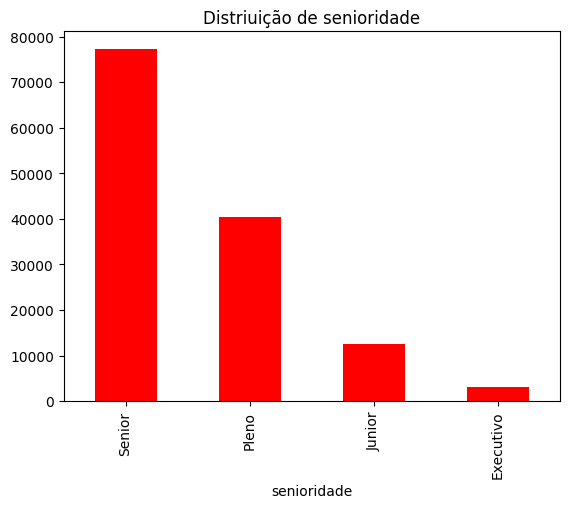

In [ ]:
df_limpo["senioridade"].value_counts().plot(kind="bar", color="red", title="Distriuição de senioridade")

**Gráfico de barras - Distribuição de senioridade:** Visualização inicial mostrando a contagem de profissionais por nível. O gráfico confirma a predominância de profissionais Senior no mercado, indicando um setor maduro com muitos profissionais experientes.


In [120]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

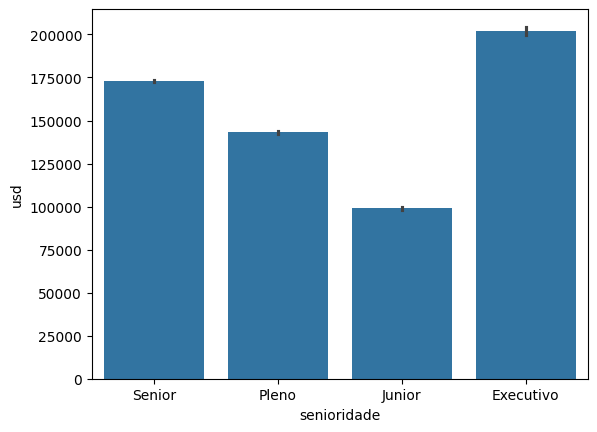

In [121]:
sns.barplot(data = df_limpo, x = 'senioridade', y='usd')

**Gráfico de barras - Salário médio por senioridade:** Primeira visualização comparando salários médios. Mostra que há diferenças significativas entre os níveis, com Executivos ganhando mais, seguidos por Senior, Pleno e Junior, refletindo a progressão natural de carreira e valorização da experiência.


**Média salarial por senioridade:** Os valores confirmam a hierarquia esperada: Executivos lideram, seguidos por Senior, Pleno e Junior. A diferença entre níveis é substancial, mostrando que a experiência e responsabilidade são bem remuneradas no mercado de dados.

In [ ]:
import matplotlib.pyplot as plt

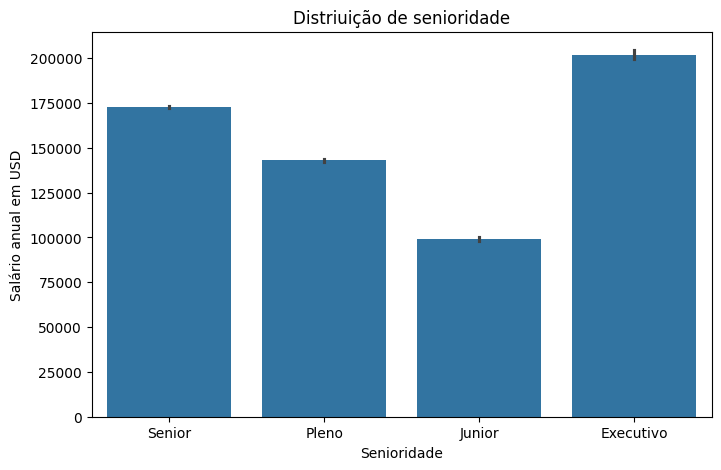

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y='usd')
plt.title("Distriuição de senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário anual em USD")
plt.show()#mostra grafico sem texto nem nada como na anterior


**Gráfico melhorado - Salário por senioridade:** Versão formatada com título e labels adequados facilitada pela biblioteca matplotlib (agora não temos mais aquele texto que aparecia no topo da figura ao utlizar a seaborn e o pandas).


In [ ]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

In [ ]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [ ]:
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

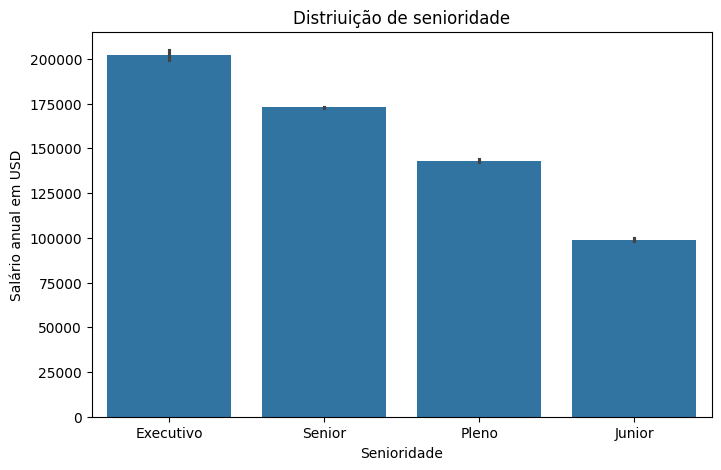

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y='usd', order=ordem)
plt.title("Distriuição de senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário anual em USD")
plt.show()#mostra grafico sem texto nem nada como na anterior

**Mudança de ordem:** Podemos mudar a ordem das barras para uma interpretação mais intuitiva dos dados em ordem decrescente

In [ ]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True)

senioridade
Junior        99034.963267
Pleno        143044.845979
Senior       172850.838301
Executivo    202027.667813
Name: usd, dtype: float64

In [ ]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

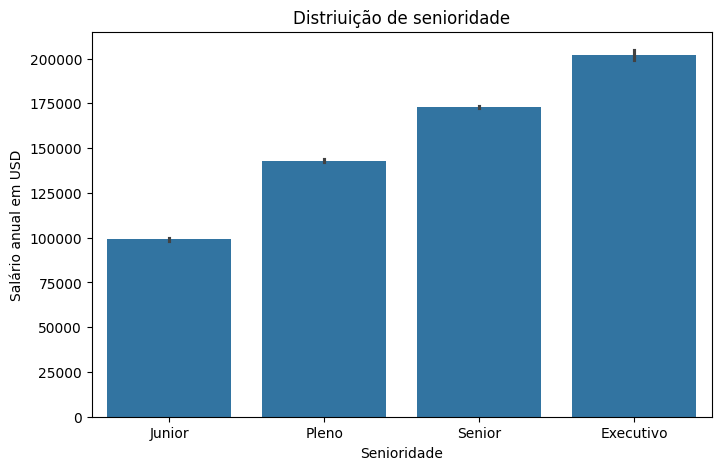

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y='usd', order=ordem)
plt.title("Distriuição de senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário anual em USD")
plt.show()#mostra grafico sem texto nem nada como na anterior

Ou também podemos fazer em ordem crescente como mostrado acima.

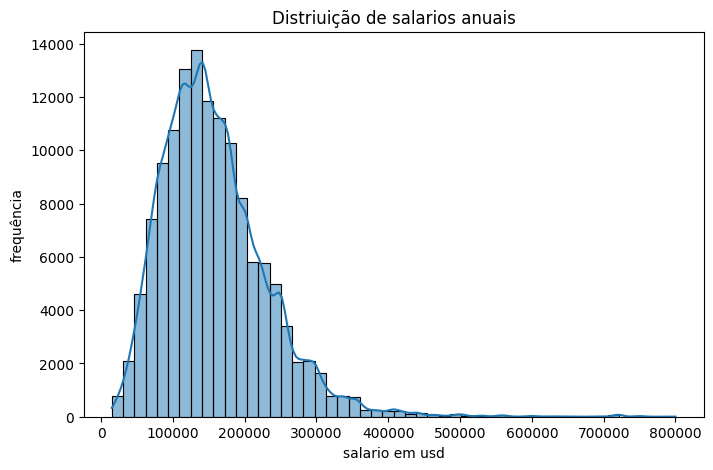

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distriuição de salarios anuais")
plt.xlabel("salario em usd")
plt.ylabel("frequência")
plt.show()

**Histograma de salários:** A distribuição mostra uma assimetria positiva (cauda à direita), indicando que a maioria dos salários está concentrada em valores menores, com alguns outliers de salários muito altos. Isso é típico de distribuições salariais, onde poucos profissionais ganham valores excepcionais.


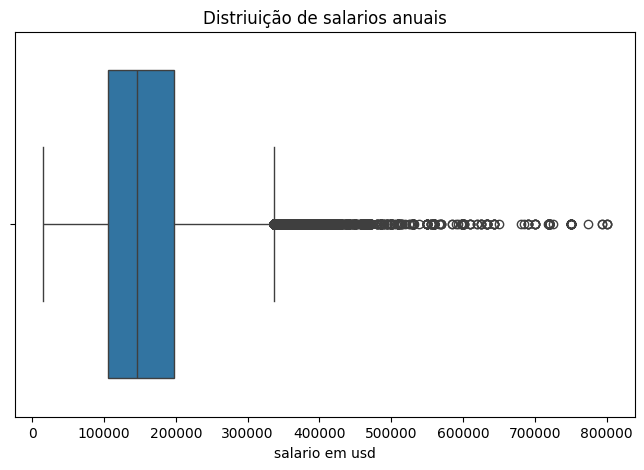

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df_limpo['usd'])
plt.title("Distriuição de salarios anuais")
plt.xlabel("salario em usd")
plt.show()

**Boxplot de salários:** O gráfico revela muitos outliers (pontos acima da linha superior), confirmando a presença de salários excepcionalmente altos. A mediana está próxima do primeiro quartil, reforçando a assimetria positiva. Esses outliers podem representar profissionais em empresas tech de elite ou em posições de liderança estratégica.

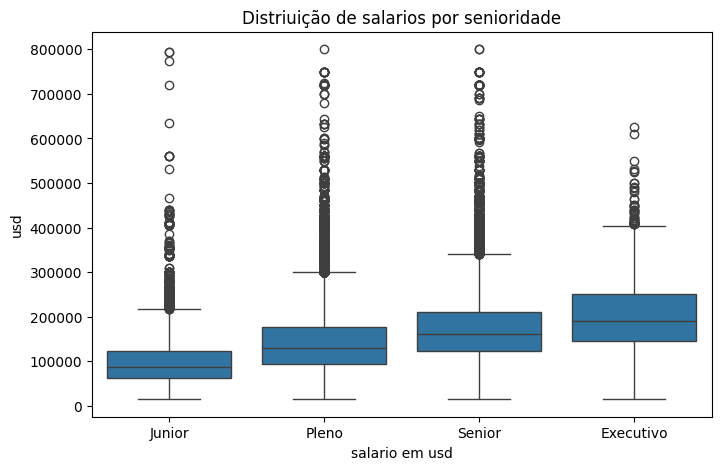

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize = (8,5))
sns.boxplot(x = 'senioridade', y='usd', data=df_limpo, order = ordem_senioridade)
plt.title("Distriuição de salarios por senioridade")
plt.xlabel("salario em usd")
plt.show()

**Boxplot de salários por senioridade:** Podemos também fazer uma observação do boxplot de cada classe de senioridade por salário, percebemos que o cargo executivo continua tendo uma maior mediana de salários em comparação com os outros, além disso este apresenta outliers mais próximos dos whiskers do boxplot. Percebe-se que a classe 'junior' possui alguns outliers com salários maiores do que os de um executivo, isso nos mostra a necessidade da reavaliação da posição dessa pessoa na empresa, como uma promoção e mudança de cargo.

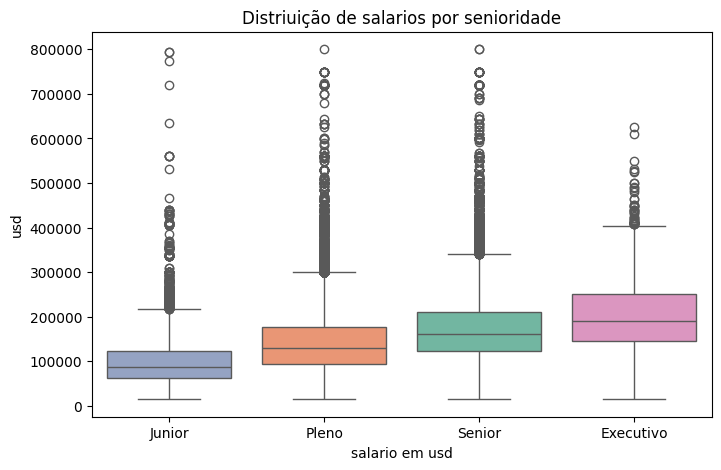

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize = (8,5))
sns.boxplot(x = 'senioridade', y='usd', data=df_limpo, order = ordem_senioridade, palette = 'Set2', hue = 'senioridade')
plt.title("Distriuição de salarios por senioridade")
plt.xlabel("salario em usd")
plt.show()

**Boxplot com paleta de cores:** Versão colorida do gráfico anterior, facilitando a distinção visual entre os níveis. A visualização interativa e colorida melhora a experiência do usuário em dashboards e apresentações.


In [ ]:
import plotly.express as px

In [ ]:
df_senioridade_usd = df_limpo.groupby('senioridade')['usd'].mean().reindex(ordem)
fig = px.bar(df_senioridade_usd, x=df_senioridade_usd.index, y='usd',
             title='Média Salarial por Senioridade',
             labels={'x': 'Senioridade', 'y': 'Média Salarial em USD'},
             color=df_senioridade_usd.index, # Color by seniority level
             color_discrete_sequence=px.colors.qualitative.Pastel # Choose a color palette
            )
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':ordem})
fig.show()

**Gráfico interativo Plotly - Salário por senioridade:** Visualização interativa permite explorar os dados com hover, zoom e outras funcionalidades. A ordenação correta (Junior → Pleno → Senior → Executivo) facilita a compreensão da progressão de carreira e pode ser usada em relatórios executivos interativos.

In [ ]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial em USD'})
fig.show()


**Gráfico de barras Plotly ordenado:** Versão alternativa um pouco mais simples, sem paleta, com ordenação automática por valores.


In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho')
fig.show()

**Gráfico de pizza - Tipos de trabalho:** Mostra a proporção entre presencial, híbrido e remoto. O trabalho presencial total tem participação significativa.

In [139]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5)
fig.show()

**Gráfico de rosca (donut):** Versão com buraco central, que permite destacar informações adicionais no centro. Esteticamente mais moderno e permite melhor uso do espaço visual em apresentações.

In [140]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

**Gráfico de rosca com percentuais:** Adição de labels com percentuais e nomes facilita a leitura imediata dos dados. Mostra claramente qual modalidade de trabalho domina o mercado.

In [141]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto Total,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto Total,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


Vendo como ficou nossos dados após as manipulações que fizemos.

Agora vamos fazer uma visualização desses dados em um mapa para o caso de salários de um cientista de dados:

In [ ]:
import pycountry

#pra passar do iso2 pro iso3
def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except AttributeError:
    return None

#nova coluna com o código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

#calculando a média salária por país para o cargo de cientista de dados somente
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']#filtragem
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

#gerando o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    hover_name='residencia_iso3',
                    title='Média Salarial por País Para o Cargo de Cientista de Dados',
                    labels={'usd': 'Média Salarial em USD','residencia_iso3': 'País'})
fig.show()



**Observação:** ISO 3166-1 alfa-2 (ISO2) e alfa-3 (ISO3) são padrões internacionais, definidos pela Organização Internacional para Padronização (ISO), que identificam países e territórios dependentes usando códigos de duas (ex: BR, US) ou três letras (ex: BRA, USA), respectivamente. No nosso código passamos para o ISO3 para um melhor entendimento da sigla e de qual país estamos falando.

**Mapa de calor - Salários de Data Scientists por país:** O mapa coroplético revela disparidades geográficas significativas nos salários. Países desenvolvidos (EUA, Canadá, Japão) tendem a ter salários mais altos, refletindo o custo de vida, maturidade do mercado tech e investimento em tecnologia. Isso é crucial para profissionais que consideram relocação ou trabalho remoto internacional.


In [143]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto Total,US,Média,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto Total,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [144]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)

Podemos exportar nossos dados com a função to_csv para outras pessoas análiserem nossas mudanças

# Conclusão

Apesar de termos feito uma análise abrangente dos nossos dados, ainda falta uma interatividade e uma escalabilidade para essa análise, por meio disso neste projeto além dessa explicação inicial de como uma análise de dados foi feita, foi feito também uma dashboard interativa onde poderemos filtrar esses dados por anos e outras variáveis, o que permite uma análise mais robusta dos nossos dados.